In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.morphology import disk
from skimage.filters.rank import equalize
from skimage.filters.rank import mean_bilateral
from skimage.filters.rank import enhance_contrast
from skimage.filters.rank import otsu
from skimage.filters import threshold_local
from skimage.exposure import equalize_hist

In [28]:
im1 = io.imread("classic.tif")
im1 = np.array(im1[3])

im2 = io.imread("axon in cerebellum.tif")
im2 = np.array(im2[2])

image = np.concatenate([im1, im2])

In [29]:
image_equalized = equalize(image, disk(50))
image_glob_equalized = equalize_hist(image)

In [30]:
image = 256 * (image / np.amax(image))
image = image.astype(int)

image_equalized = 256 * (image_equalized / np.amax(image_equalized))
image_equalized = image_equalized.astype(int)

image_glob_equalized = 256 * (image_glob_equalized / np.amax(image_glob_equalized))
image_glob_equalized = image_glob_equalized.astype(int)


In [32]:
%matplotlib qt

In [37]:
plt.figure(1)
plt.subplot(141)
plt.imshow(image)
plt.title("1")

plt.subplot(142)
plt.imshow(image_glob_equalized)
plt.title("2")

plt.subplot(143)
plt.imshow(image_equalized)
plt.title("3")

plt.subplot(144)
plt.imshow(image_equalized >= 200)
plt.title("4")




hist = np.histogram(image, bins=np.arange(0, 256))

plt.figure(2)
plt.plot(hist[1][:-1], hist[0], lw = 2)


hist = np.histogram(image_equalized, bins=np.arange(0, 256))

plt.figure(3)
plt.plot(hist[1][:-1], hist[0], lw = 2)

#plt.figure(3)
#plt.imshow(image_equalized >= a)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future v

In [214]:
bilat_image = mean_bilateral(image, disk(50), s0 = 5, s1 = 5)

//anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
//anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from int64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


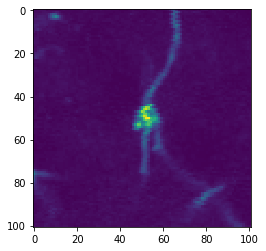

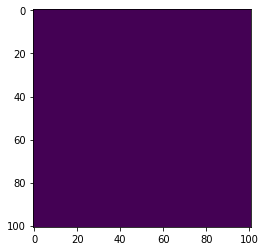

In [215]:
plt.figure(1)
plt.imshow(image)

plt.figure(2)
plt.imshow(bilat_image)

In [239]:
enh = enhance_contrast(image, disk(5))

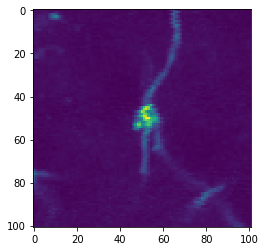

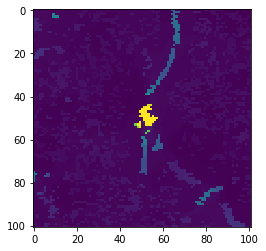

In [240]:
plt.figure(1)
plt.imshow(image)

plt.figure(2)
plt.imshow(enh)

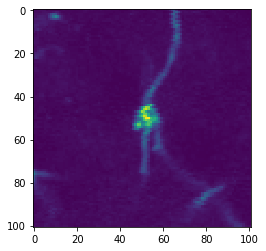

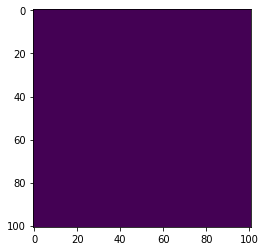

In [218]:
a = otsu(image, disk(5))

plt.figure(1)
plt.imshow(image)

plt.figure(2)
plt.imshow(image >= a)

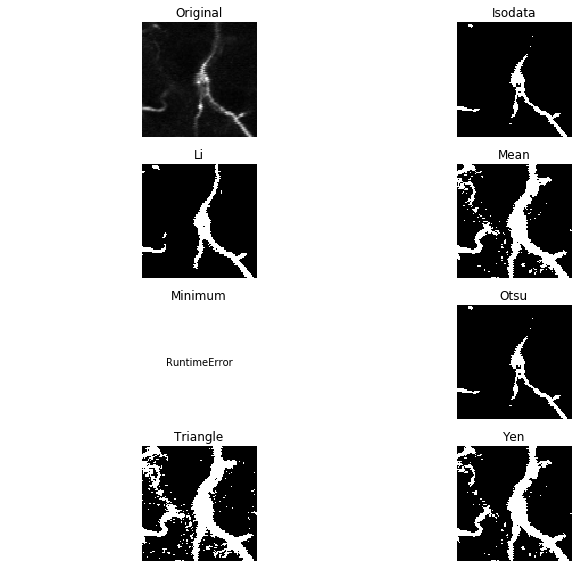

In [130]:
from skimage.filters import try_all_threshold

fix, ax = try_all_threshold(image, figsize=(10,8), verbose = False)
plt.show()